C:\Users\leegw\AppData\Local\Temp\ipykernel_13824\973992582.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Prev_Price_BTC'] = filtered_df['High_BTC'].shift(1)
C:\Users\leegw\AppData\Local\Temp\ipykernel_13824\973992582.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Prev_Price_SNP'] = filtered_df['Price_SNP'].shift(1)


RMSE: 580.0029918279143


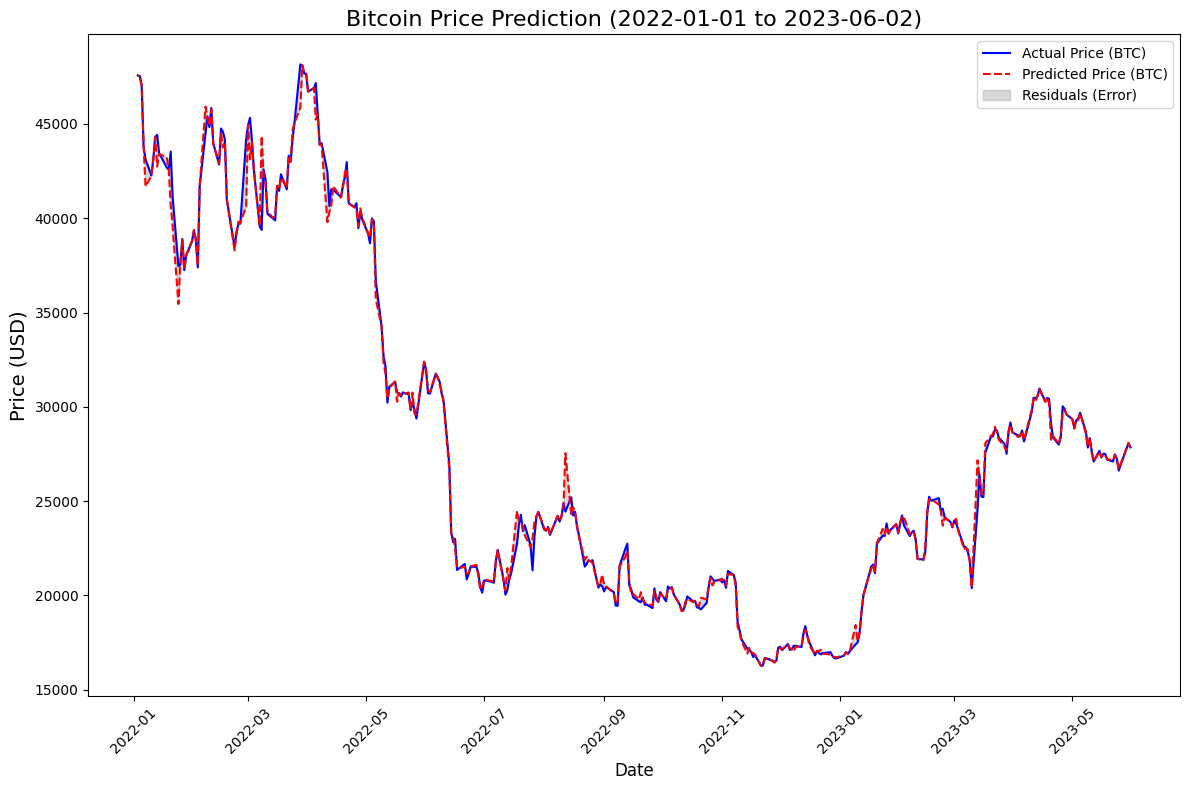

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

btc_df = pd.read_csv('./data/BTC_USD.csv')
snp_df = pd.read_csv('./data/snp500.csv')

snp_df['Date'] = snp_df['Date'].str.split(' ').str[0]
snp_df['Date'] = pd.to_datetime(snp_df['Date'], format='%Y-%m-%d')

btc_df['Date'] = pd.to_datetime(btc_df['Date'], format='%m/%d/%Y')
btc_df['High_BTC'] = btc_df['High'].replace({',': ''}, regex=True).astype(float)
btc_df['Low_BTC'] = btc_df['Low'].replace({',': ''}, regex=True).astype(float)

snp_df['Price'] = (snp_df['High'] + snp_df['Low']) / 2

btc_df['Year'] = pd.to_datetime(btc_df['Date']).dt.year
btc_df['Month'] = pd.to_datetime(btc_df['Date']).dt.month
btc_df['Day'] = pd.to_datetime(btc_df['Date']).dt.day
btc_df['Weekday'] = pd.to_datetime(btc_df['Date']).dt.weekday

snp_df['Year'] = snp_df['Date'].dt.year
snp_df['Month'] = snp_df['Date'].dt.month
snp_df['Day'] = snp_df['Date'].dt.day
snp_df['Weekday'] = snp_df['Date'].dt.weekday

merged_df = pd.merge(btc_df, snp_df[['Date', 'Price']], on='Date', suffixes=('_BTC', '_SNP'))

merged_df['Prev_Price_BTC'] = merged_df['High_BTC'].shift(1)
merged_df['Prev_Price_SNP'] = merged_df['Price_SNP'].shift(1)

merged_df = merged_df.dropna()

X = merged_df[['Year', 'Month', 'Day', 'Weekday', 'Prev_Price_BTC', 'Prev_Price_SNP']]
y = merged_df['High_BTC']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = xgb.XGBRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

start_date = '2022-01-01'
end_date = '2023-06-02'

filtered_df = merged_df[(merged_df['Date'] >= start_date) & (merged_df['Date'] <= end_date)]

filtered_df['Prev_Price_BTC'] = filtered_df['High_BTC'].shift(1)
filtered_df['Prev_Price_SNP'] = filtered_df['Price_SNP'].shift(1)
filtered_df = filtered_df.dropna()

X_pred = filtered_df[['Year', 'Month', 'Day', 'Weekday', 'Prev_Price_BTC', 'Prev_Price_SNP']]
y_true = filtered_df['High_BTC']

y_pred = model.predict(X_pred)

mse_pred = mean_squared_error(y_true, y_pred)
rmse_pred = np.sqrt(mse_pred)
print(f"RMSE: {rmse_pred}")

residuals = y_true - y_pred

plt.figure(figsize=(12, 8))

plt.plot(filtered_df['Date'], y_true, label='Actual Price (BTC)', color='blue')
plt.plot(filtered_df['Date'], y_pred, label='Predicted Price (BTC)', color='red', linestyle='--')

plt.fill_between(filtered_df['Date'], y_true, y_pred, color='gray', alpha=0.3, label='Residuals (Error)')

plt.title('Bitcoin Price Prediction (2022-01-01 to 2023-06-02)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters: {'learning_rate': 0.1, 'n_estimators': 300}
Optimized XGBoost RMSE for prediction period (2022-01-01 to 2023-06-02): 167.50863485151848


C:\Users\leegw\AppData\Local\Temp\ipykernel_13824\3386322858.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Prev_Price_BTC'] = filtered_df['High_BTC'].shift(1)
C:\Users\leegw\AppData\Local\Temp\ipykernel_13824\3386322858.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Prev_Price_SNP'] = filtered_df['Price_SNP'].shift(1)


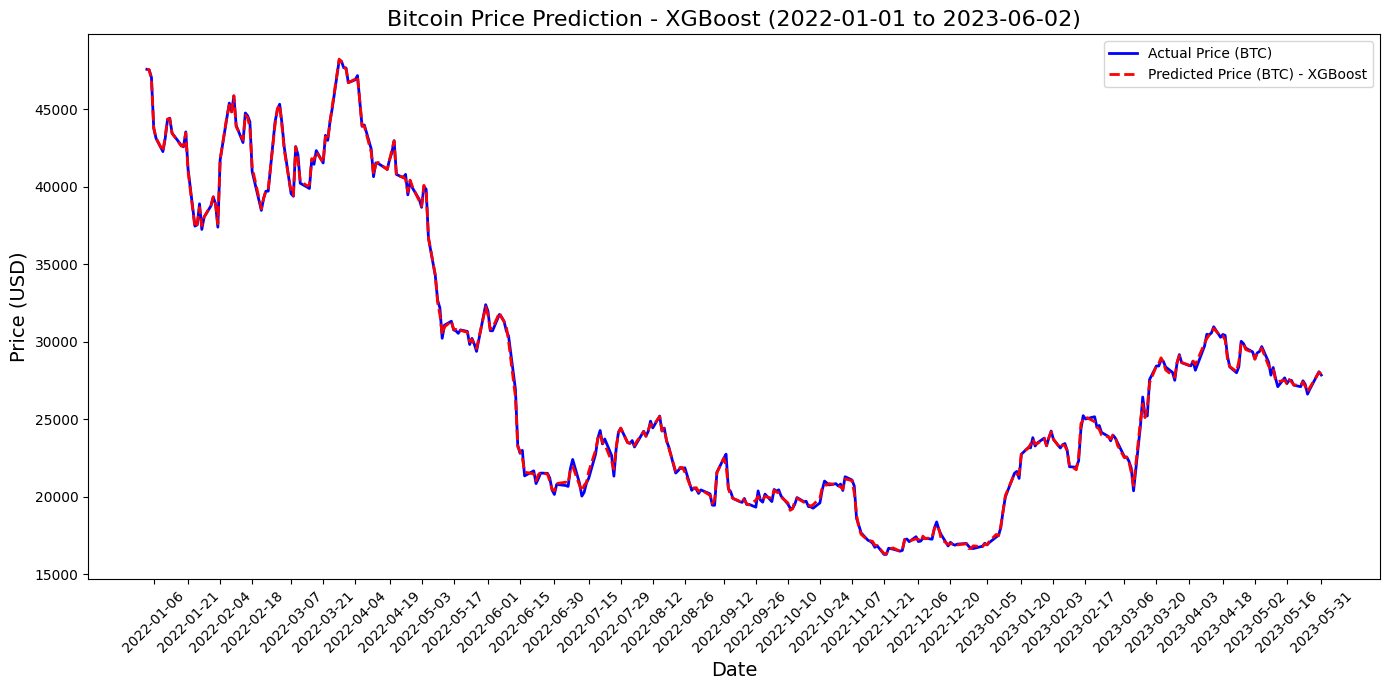

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import xgboost as xgb

btc_df = pd.read_csv('./data/BTC_USD.csv')
snp_df = pd.read_csv('./data/snp500.csv')

snp_df['Date'] = snp_df['Date'].str.split(' ').str[0]  
snp_df['Date'] = pd.to_datetime(snp_df['Date'], format='%Y-%m-%d') 

btc_df['Date'] = pd.to_datetime(btc_df['Date'], format='%m/%d/%Y') 
btc_df['High_BTC'] = btc_df['High'].replace({',': ''}, regex=True).astype(float) 
btc_df['Low_BTC'] = btc_df['Low'].replace({',': ''}, regex=True).astype(float)  

snp_df['Price'] = (snp_df['High'] + snp_df['Low']) / 2

btc_df['Year'] = btc_df['Date'].dt.year
btc_df['Month'] = btc_df['Date'].dt.month
btc_df['Day'] = btc_df['Date'].dt.day
btc_df['Weekday'] = btc_df['Date'].dt.weekday

snp_df['Year'] = snp_df['Date'].dt.year
snp_df['Month'] = snp_df['Date'].dt.month
snp_df['Day'] = snp_df['Date'].dt.day
snp_df['Weekday'] = snp_df['Date'].dt.weekday

merged_df = pd.merge(btc_df, snp_df[['Date', 'Price']], on='Date', suffixes=('_BTC', '_SNP'))

merged_df['Prev_Price_BTC'] = merged_df['High_BTC'].shift(1)
merged_df['Prev_Price_SNP'] = merged_df['Price_SNP'].shift(1)

merged_df = merged_df.dropna()

X = merged_df[['Year', 'Month', 'Day', 'Weekday', 'Prev_Price_BTC', 'Prev_Price_SNP']]
y = merged_df['High_BTC']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

param_grid = {
    'n_estimators': [100, 200, 300, 500],  
    'learning_rate': [0.01, 0.05, 0.1, 0.2], 
}

model_xgb = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse')

grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")

best_model_xgb = grid_search.best_estimator_

start_date = '2022-01-01'
end_date = '2023-06-02'

filtered_df = merged_df[(merged_df['Date'] >= start_date) & (merged_df['Date'] <= end_date)]

filtered_df['Prev_Price_BTC'] = filtered_df['High_BTC'].shift(1)
filtered_df['Prev_Price_SNP'] = filtered_df['Price_SNP'].shift(1)
filtered_df = filtered_df.dropna()

X_pred = filtered_df[['Year', 'Month', 'Day', 'Weekday', 'Prev_Price_BTC', 'Prev_Price_SNP']]
y_true = filtered_df['High_BTC']

y_pred_xgb = best_model_xgb.predict(X_pred)

mse_xgb = mean_squared_error(y_true, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
print(f"Optimized XGBoost RMSE for prediction period (2022-01-01 to 2023-06-02): {rmse_xgb}")

plt.figure(figsize=(14, 7))

plt.plot(filtered_df['Date'], y_true, label='Actual Price (BTC)', color='blue', linewidth=2)
plt.plot(filtered_df['Date'], y_pred_xgb, label='Predicted Price (BTC) - XGBoost', color='red', linestyle='--', linewidth=2)

plt.title('Bitcoin Price Prediction - XGBoost (2022-01-01 to 2023-06-02)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend()

date_labels = filtered_df['Date']
plt.xticks(date_labels[::10], rotation=45)  

plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

btc_df = pd.read_csv('./data/BTC_USD.csv')
snp_df = pd.read_csv('./data/snp500.csv')

snp_df['Date'] = snp_df['Date'].str.split(' ').str[0]  
snp_df['Date'] = pd.to_datetime(snp_df['Date'], format='%Y-%m-%d') 
btc_df['Date'] = pd.to_datetime(btc_df['Date'], format='%m/%d/%Y') 
btc_df['High_BTC'] = btc_df['High'].replace({',': ''}, regex=True).astype(float) 
btc_df['Low_BTC'] = btc_df['Low'].replace({',': ''}, regex=True).astype(float)  

snp_df['Price'] = (snp_df['High'] + snp_df['Low']) / 2

btc_df['Year'] = btc_df['Date'].dt.year
btc_df['Month'] = btc_df['Date'].dt.month
btc_df['Day'] = btc_df['Date'].dt.day
btc_df['Weekday'] = btc_df['Date'].dt.weekday
snp_df['Year'] = snp_df['Date'].dt.year
snp_df['Month'] = snp_df['Date'].dt.month
snp_df['Day'] = snp_df['Date'].dt.day
snp_df['Weekday'] = snp_df['Date'].dt.weekday

merged_df = pd.merge(btc_df, snp_df[['Date', 'Price']], on='Date', suffixes=('_BTC', '_SNP'))

merged_df['Prev_Price_BTC'] = merged_df['High_BTC'].shift(1)
merged_df['Prev_Price_SNP'] = merged_df['Price_SNP'].shift(1)

merged_df = merged_df.dropna()

start_date = '2022-01-01'
end_date = '2023-06-02'

filtered_df = merged_df[(merged_df['Date'] >= start_date) & (merged_df['Date'] <= end_date)]

filtered_df.loc[:, 'Prev_Price_BTC'] = filtered_df['High_BTC'].shift(1)
filtered_df.loc[:, 'Prev_Price_SNP'] = filtered_df['Price_SNP'].shift(1)
filtered_df = filtered_df.dropna()

X_pred = filtered_df[['Year', 'Month', 'Day', 'Weekday', 'Prev_Price_BTC', 'Prev_Price_SNP']]
y_true = filtered_df['High_BTC']

X = merged_df[['Year', 'Month', 'Day', 'Weekday', 'Prev_Price_BTC', 'Prev_Price_SNP']]
y = merged_df['High_BTC']
X_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, shuffle=False)

model_rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 150], 
    'max_depth': [10, 15, 20],  
    'min_samples_split': [5, 10],  
    'min_samples_leaf': [2, 4],  
    'max_features': ['sqrt', 'log2'],  
}

grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print(f"Best parameters found: {grid_search.best_params_}")

best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_pred)

mse_rf = mean_squared_error(y_true, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
print(f"Optimized Random Forest RMSE for prediction period (2022-01-01 to 2023-06-02): {rmse_rf}")

plt.figure(figsize=(14, 7))

plt.plot(filtered_df['Date'], y_true, label='Actual Price (BTC)', color='blue', linewidth=2)
plt.plot(filtered_df['Date'], y_pred_rf, label='Predicted Price (BTC) - Random Forest', color='red', linestyle='--', linewidth=2)

plt.title('Bitcoin Price Prediction - Random Forest (2022-01-01 to 2023-06-02)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend()

date_labels = filtered_df['Date']
plt.xticks(date_labels[::10], rotation=45)  

plt.tight_layout()
plt.show()



Fitting 5 folds for each of 48 candidates, totalling 240 fits
